In [2]:
# import necessary libraries
import tensorflow as tf # deep learning framework
from tensorflow.keras import datasets, layers, models, Input # tools for model creation
import matplotlib.pyplot as plt # for visualization of images

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
training data shape (50000, 32, 32, 3), training labels shape (50000, 1)
test data shape (10000, 32, 32, 3), test labels shape (10000, 1)


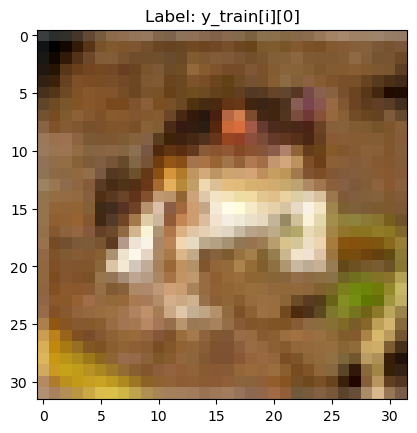

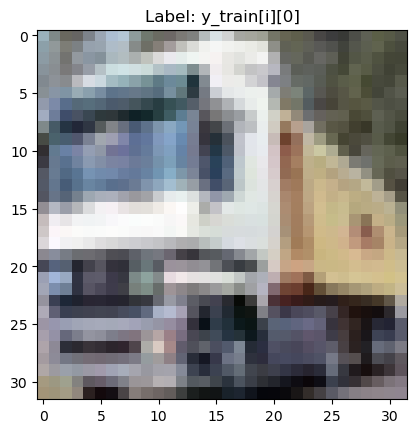

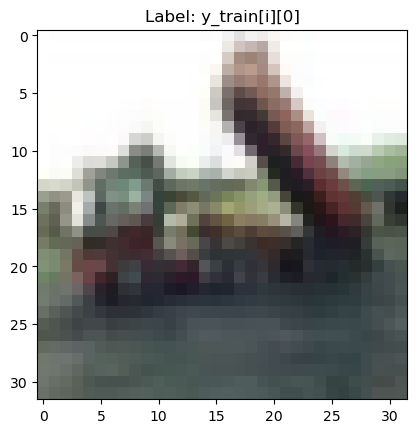

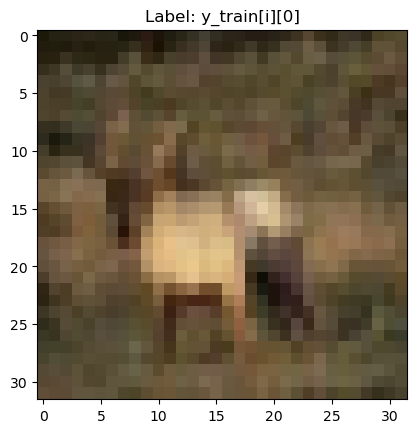

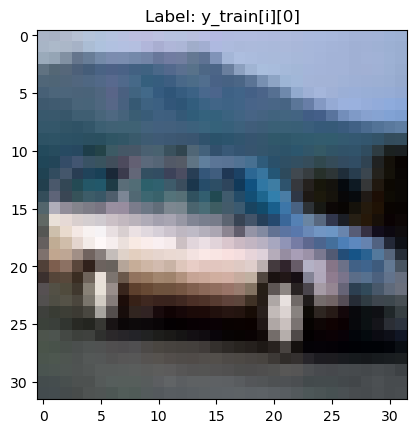

In [3]:
#LOAD AND EXPLORE THE CIFAR-10 DATASET

#load the CIFAR-10 dataset (32x32 image of 10 classes)
#x_train = images and y_train = labels
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#normalize pixel values to range between 0 to 1 for better model performance
x_train, x_test = x_train/255.0, x_test/255.0

# print dataset shapes to understand its structure
print(f"training data shape {x_train.shape}, training labels shape {y_train.shape}")
print(f"test data shape {x_test.shape}, test labels shape {y_test.shape}")

# display first 5 training images
for i in range(5):
  plt.imshow(x_train[i])
  plt.title(f"Label: y_train[i][0]")
  plt.show()

In [4]:
#CNN MODEL
#initialize the sequential model
model = models.Sequential()

#recommended wau to pass input shape by Keras
model.add(Input(shape=(32,32,3)))

# add a convolutional layer with 32 filters and relu activation
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# add a max pooling layer to reduce spatial dimensions
model.add(layers.MaxPool2D((2,2)))

#add another convulational layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#add another max pooling layer
model.add(layers.MaxPooling2D(2,2))

# add a dense (fully connected) layer after flattening the output
model.add(layers.Flatten())

#add a dense layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))

#output layer with 10 neurons with 10 classes
model.add(layers.Dense(10, activation='softmax'))


In [5]:
#compile the model with loss function, optimizer and evaluation metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
#train the model on training dataset and validate on test dataset
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3890 - loss: 1.6854 - val_accuracy: 0.5700 - val_loss: 1.1872
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6100 - loss: 1.1102 - val_accuracy: 0.6318 - val_loss: 1.0537
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6655 - loss: 0.9585 - val_accuracy: 0.6589 - val_loss: 0.9716
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6946 - loss: 0.8638 - val_accuracy: 0.6820 - val_loss: 0.9225
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7237 - loss: 0.7977 - val_accuracy: 0.6956 - val_loss: 0.8846
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7483 - loss: 0.7251 - val_accuracy: 0.6822 - val_loss: 0.9190
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7687 - loss: 0.6589 - val_accuracy: 0.6989 - val_loss: 0.8844
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7822 - loss: 

In [14]:
#evaluate the models performance on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2) #verbose=0 shows nothing, 1 shows progress bar, 2 shows details

print(f"Test Loss: {test_loss}, Test Accuracu: {test_accuracy}")

313/313 - 1s - 3ms/step - accuracy: 0.6935 - loss: 0.9713
Test Loss: 0.9712981581687927, Test Accuracu: 0.6934999823570251


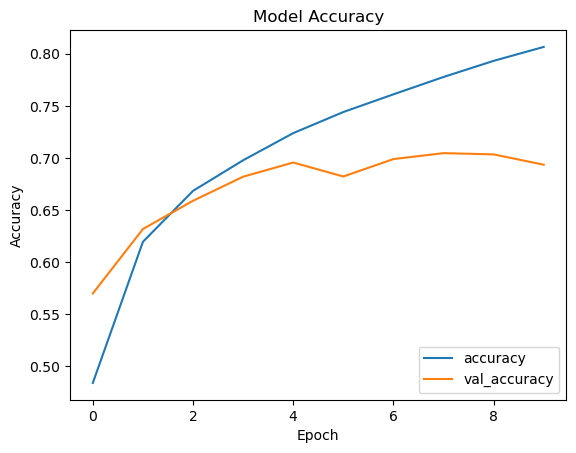

In [15]:
# visualizing training progress

#plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label = ['accuracy'])
plt.plot(history.history['val_accuracy'], label = ['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

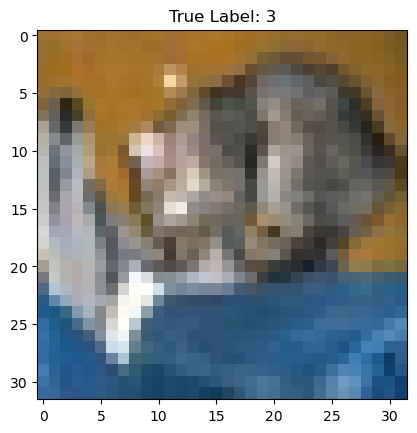

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label 3


In [18]:
# test the model with a single image
import numpy as np

#select a random test image
index = 0 #change this to check different images
image = x_test[index]

#display the selected image
plt.imshow(image)
plt.title(f'True Label: {y_test[index][0]}')
plt.show()

#add batch dimension and make a prediction
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

print(f'Predicted Label {predicted_label}')

In [20]:
# Save the model in Keras format
# to use it in the future without training again
model.save("my_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


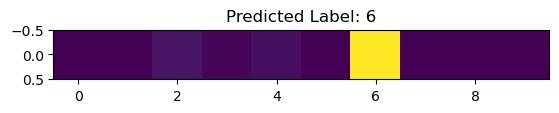

---------------
Predicted Label 6
Prediction Confidence 0.8975038


In [44]:
# Run CIFAR-10 model that we trained.
from tensorflow.keras.preprocessing import image as tf_image



# load your image
img = tf_image.load_img('/Users/danishsyed/Downloads/b2.jpg', target_size = (32,32))

# convert the image to a numpuy array
image_array = tf_image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0) # converting into batch format

# normalize the image (if required)
image_array = image_array / 255.0

# make prediction
predictions = model.predict(image_array)

#get the predicted label
predicted_label = np.argmax(predictions)

#show the image and predicted label
plt.imshow(predictions)
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

#print predicted label and confidence
print("---------------")
print(f'Predicted Label', predicted_label)
print(f'Prediction Confidence', predictions[0][predicted_label])

In [46]:
#confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# make predictions on the test set and convert them into class labels

#predict on the test set
y_pred = model.predict(x_test)

#convert predictions to class labels (argmax returns the index of the highest probability)
y_pred_classes = np.argmax(y_pred, axis=1)

#flatten y_test if its not in flat format already
y_test_flat = y_test.flatten()

#Generate the confusion matrix
#compute the confusion matrix using confusion_matrix from sklearn
cm = confusion_matrix(y_test_flat, y_pred_classes)

print('Print confusion matrix')
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Print confusion matrix
[[765  35  47  20  20  11  22   4  38  38]
 [ 17 865   4   8   3   5  12   2  13  71]
 [ 72  14 515  52 100  78 126  25   9   9]
 [ 21  27  40 442  91 186 145  23   7  18]
 [ 21   8  47  52 658  29 135  38   5   7]
 [  7   5  36 160  58 615  72  31   4  12]
 [  6   8  25  35  18  11 886   2   4   5]
 [ 16   8  41  35  79  70  18 715   2  16]
 [108  82  12  15  14  17  18   4 693  37]
 [ 34 104   8  12   6   9  17  11  18 781]]


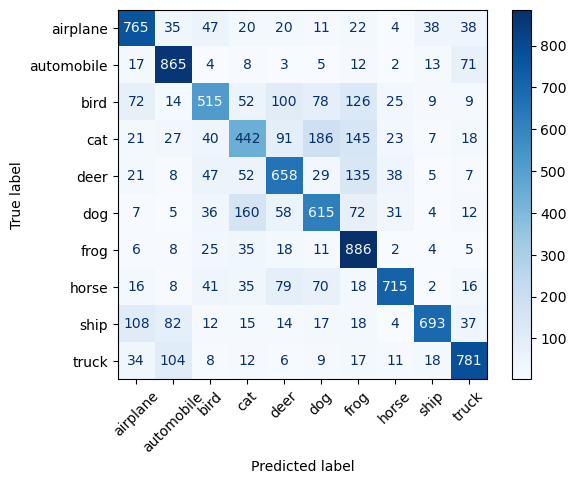

In [48]:

# Define class names (CIFAR-10 categories)
class_names = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

#display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)

In [50]:
#compare predictions with actual labels
correct_indeces = np.where(y_pred_classes == y_test_flat)[0]
incorrect_indeces = np.where(y_pred_classes != y_test_flat)[0]

print(f'Number of correct prediction {len(correct_indeces)}')
print(f'Number of incorrect prediction {len(incorrect_indeces)}')

Number of correct prediction 6935
Number of incorrect prediction 3065


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


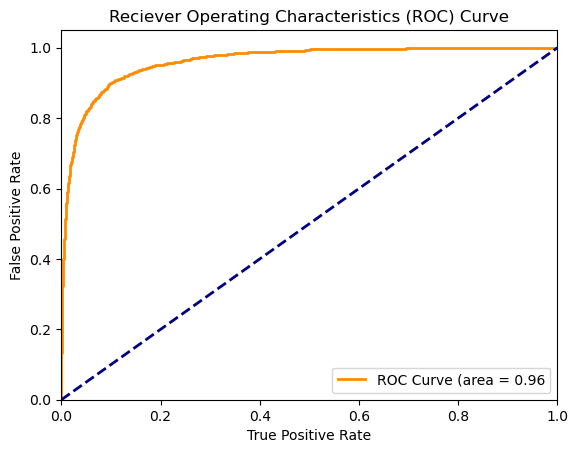

In [76]:
#ROC curve for class 0 airplane
from sklearn.metrics import roc_curve, auc

#predict probabilities for the test set
y_pred_proba = model.predict(x_test)

#cifar-10 has 10 class we will use 1st class in this example (lets pick 0)
y_true = (y_test == 0).astype(int)
y_pred = y_pred_proba[:,0]

#compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

#plat ROC curve
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC Curve (area = {roc_auc:.2f}')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


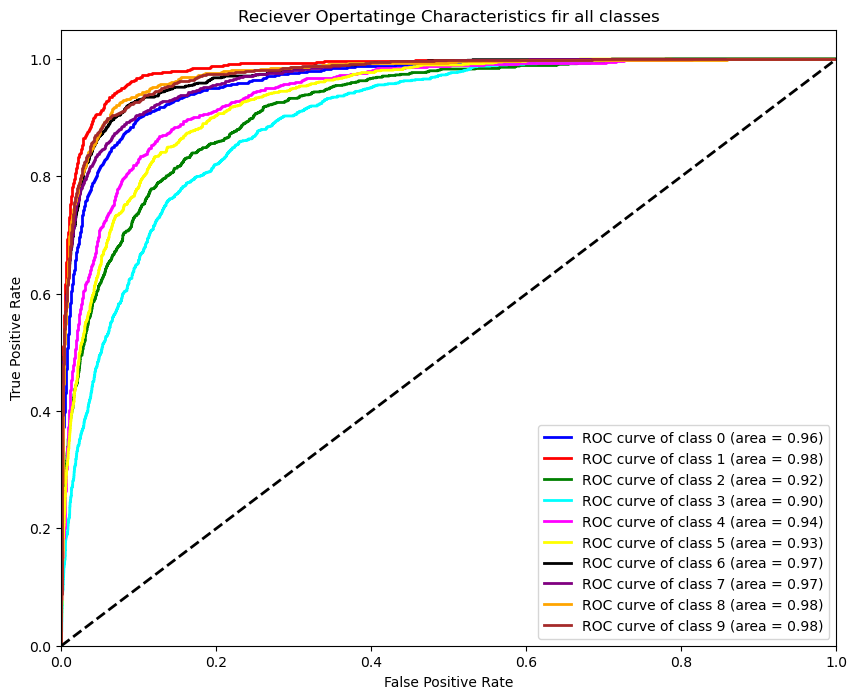

In [98]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

#binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])

#get the predicted probabilities for each class
y_pred_proba = model.predict(x_test)

#compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plot all roc curves
plt.figure(figsize=(10,8))
colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, 
             label = 'ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Opertatinge Characteristics fir all classes')
plt.legend(loc='lower right')
plt.show()